### Tennis Game Analytics- Unlocking Tennis Data with SportRadar API- EDA analysis

# **Project Name**    -  Tennis Game Analytics EDA analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual 
##### **Team Member 1 -** - Rathish S
##### **Team Member 2 -** - NIL
##### **Team Member 3 -** - NIL
##### **Team Member 4 -** - NIL
##### **Team Member 5 -** -NIL

# **Project Summary -**

**The project "Game Analytics: Unlocking Tennis Data with SportRadar API" seeks to
develop a complete solution to professional tennis data analytics by leveraging real-time
data from the SportRadar API. The project seeks to help sports analysts, players, and
organizations achieve greater insights into tournament dynamics, player performances,
and event distributions. By taking leverage from structured data across categories,
competitions, venues, competitors, and player rankings, the project creates a solid
foundation for interactive analysis. The core technologies adopted are Python for data
scraping, SQL for data management, and Streamlit for building an intuitive and
interactive web application. The final outcome allows users to visualize data, filter based
on certain parameters, and spot trends across world tennis events by turning raw sports
data into operational insights.**

# **Problem Statement**


**Extracted CSV files from API web source need to be analysed through EDA process to provide answers for the business problems ?**

#### **Define Your Business Objective?**

**The following are the business objectives for the project:-**

1) To analyze the dataset and find which atheletes are leading.
2) To find which country is promoting Tennis game better and producing great players.
3) Gender analysis, that how much people are actually participating as an athelete in tennis sports on gender basis.
4) To find ways to improve tennis game and encouragement for underperforming countries.

## ***1. Know Your Data***

### Import Libraries

In [6]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
import seaborn as sns
import missingno as ms
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import plotly.express as px
import random
from wordcloud import WordCloud
import ast
from PIL import Image
import IPython.display as display
import statsmodels as stat
import geopandas as geo

### Dataset Loading

In [7]:
# Load Dataset
dataset1 = pd.read_csv("Categories.csv")
dataset2 = pd.read_csv("Competitions.csv")
dataset3 = pd.read_csv("Competitor_Rankings.csv")
dataset4 = pd.read_csv("Competitors.csv")
dataset5 = pd.read_csv("Complexes.csv")
dataset6 = pd.read_csv("Venue.csv")

### Datasets Merging 

In [8]:
data1 = pd.merge(dataset1,dataset2, on = 'category_id', how = 'outer')

In [9]:
data2 = pd.merge(dataset3,dataset4, on = 'competitor_id', how = 'outer')

In [10]:
data3 = pd.merge(dataset5,dataset6, on = 'complex_id', how = 'outer')

### Dataset First View after Merging into 3 parts

In [29]:
data1.tail(5)

category_id category_name        competition_id  \
6105  sr:category:871      WTA 125K  sr:competition:47047   
6106  sr:category:871      WTA 125K  sr:competition:47053   
6107  sr:category:871      WTA 125K  sr:competition:47055   
6108  sr:category:871      WTA 125K  sr:competition:47111   
6109  sr:category:871      WTA 125K  sr:competition:47113   

                                       competition_name             parent_id  \
6105        WTA 125K San Sebastian, Spain Women Doubles  sr:competition:47043   
6106  WTA 125K Caldas da Rainha, Portugal Women Singles  sr:competition:47051   
6107  WTA 125K Caldas da Rainha, Portugal Women Doubles  sr:competition:47051   
6108             WTA 125K Rovereto, Italy Women Doubles  sr:competition:47109   
6109             WTA 125K Rovereto, Italy Women Singles  sr:competition:47109   

         type gender  
6105  doubles  women  
6106  singles  women  
6107  doubles  women  
6108  doubles  women  
6109  singles  women

In [30]:
data2.tail(5)

rank_id  rank  movement  points  competitions_played  \
995      159   159        18     481                   21   
996      846   347        -3     224                    6   
997      621   121         0     649                   25   
998      469   469        -1     123                   12   
999      489   489         1     115                    2   

            competitor_id                 name            country  \
995   sr:competitor:99377  Kestelboim, Mariano          Argentina   
996   sr:competitor:99405     Inglis, Maddison          Australia   
997   sr:competitor:99429          Hule, Petra          Australia   
998   sr:competitor:99587     Chung, Yun Seong  Republic of Korea   
999  sr:competitor:997473        Bernet, Henry        Switzerland   

    country_code abbreviation  
995          ARG          KES  
996          AUS          ING  
997          AUS          HUL  
998          KOR          CHU  
999          CHE          BER

In [31]:
data3.tail(5)

complex_id         complex_name        venue_id    venue_name  \
3595  sr:complex:9725  Arena Armeets Sofia  sr:venue:17756  Center Court   
3596  sr:complex:9725  Arena Armeets Sofia  sr:venue:17758       Court 1   
3597  sr:complex:9725  Arena Armeets Sofia  sr:venue:23352       Court 3   
3598  sr:complex:9725  Arena Armeets Sofia  sr:venue:23354       Court 4   
3599  sr:complex:9725  Arena Armeets Sofia  sr:venue:23356       Court 2   

     city_name country_name country_code      timezone  
3595     Sofia     Bulgaria          BGR  Europe/Sofia  
3596     Sofia     Bulgaria          BGR  Europe/Sofia  
3597     Sofia     Bulgaria          BGR  Europe/Sofia  
3598     Sofia     Bulgaria          BGR  Europe/Sofia  
3599     Sofia     Bulgaria          BGR  Europe/Sofia

### Dataset Rows & Columns count

In [33]:
# Dataset Rows & Columns count
data1.shape

(6110, 7)

In [34]:
data2.shape

(1000, 10)

In [35]:
data3.shape

(3600, 8)

### Dataset Information

In [37]:
# Dataset Info
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6110 entries, 0 to 6109
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   category_id       6110 non-null   object
 1   category_name     6110 non-null   object
 2   competition_id    6110 non-null   object
 3   competition_name  6110 non-null   object
 4   parent_id         5846 non-null   object
 5   type              6110 non-null   object
 6   gender            6110 non-null   object
dtypes: object(7)
memory usage: 334.3+ KB


In [38]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   rank_id              1000 non-null   int64 
 1   rank                 1000 non-null   int64 
 2   movement             1000 non-null   int64 
 3   points               1000 non-null   int64 
 4   competitions_played  1000 non-null   int64 
 5   competitor_id        1000 non-null   object
 6   name                 1000 non-null   object
 7   country              1000 non-null   object
 8   country_code         940 non-null    object
 9   abbreviation         1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.3+ KB


In [39]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   complex_id    3600 non-null   object
 1   complex_name  3600 non-null   object
 2   venue_id      3455 non-null   object
 3   venue_name    3455 non-null   object
 4   city_name     3455 non-null   object
 5   country_name  3455 non-null   object
 6   country_code  3455 non-null   object
 7   timezone      3455 non-null   object
dtypes: object(8)
memory usage: 225.1+ KB


#### Duplicate Values

In [41]:
# Dataset Duplicate Value Count
duplicates = data1.duplicated(keep=False)

# Count the duplicate values
duplicate_count = duplicates.value_counts()

print(duplicate_count)

False    6110
Name: count, dtype: int64


In [42]:
# Dataset Duplicate Value Count
duplicates = data2.duplicated(keep=False)

# Count the duplicate values
duplicate_count = duplicates.value_counts()

print(duplicate_count)

False    1000
Name: count, dtype: int64


In [43]:
# Dataset Duplicate Value Count
duplicates = data3.duplicated(keep=False)

# Count the duplicate values
duplicate_count = duplicates.value_counts()

print(duplicate_count)

False    3600
Name: count, dtype: int64


#### Missing Values/Null Values

In [45]:
# Missing Values/Null Values Count
data1.isnull().sum()

category_id           0
category_name         0
competition_id        0
competition_name      0
parent_id           264
type                  0
gender                0
dtype: int64

In [46]:
data2.isnull().sum()

rank_id                 0
rank                    0
movement                0
points                  0
competitions_played     0
competitor_id           0
name                    0
country                 0
country_code           60
abbreviation            0
dtype: int64

In [47]:
data3.isnull().sum()

complex_id        0
complex_name      0
venue_id        145
venue_name      145
city_name       145
country_name    145
country_code    145
timezone        145
dtype: int64

### What did you know about your dataset?

**The following things are known about the dataset:-**

1) There are total 6 datasets but we merged them into 3.
2) There are 8 columns have some missing values in them.
3) There are no duplicates for all three merged datasets.
4) Size of the Merged Dataset 1 - 6110 rows , 7 columns.
5) Size of the Merged Dataset 2 - 1000 rows, 10 columns.
6) Size of the Merged Dataset 3 - 3600 rows, 8 columns.

## ***2. Understanding Your Variables***

In [51]:
# Dataset Columns
data1.columns

Index(['category_id', 'category_name', 'competition_id', 'competition_name',
       'parent_id', 'type', 'gender'],
      dtype='object')

In [52]:
data2.columns

Index(['rank_id', 'rank', 'movement', 'points', 'competitions_played',
       'competitor_id', 'name', 'country', 'country_code', 'abbreviation'],
      dtype='object')

In [53]:
data3.columns

Index(['complex_id', 'complex_name', 'venue_id', 'venue_name', 'city_name',
       'country_name', 'country_code', 'timezone'],
      dtype='object')

In [54]:
# Dataset Describe
data1.describe()

category_id category_name        competition_id competition_name  \
count              6110          6110                  6110             6110   
unique               18            18                  6110             6110   
top     sr:category:785       ITF Men  sr:competition:12229             IPTL   
freq               2198          2198                     1                1   

                  parent_id     type gender  
count                  5846     6110   6110  
unique                 2900        4      3  
top     sr:competition:2589  singles    men  
freq                      5     3163   3493

In [55]:
data2.describe()

rank_id         rank     movement      points  competitions_played
count  1000.000000  1000.000000  1000.000000  1000.00000          1000.000000
mean    500.500000   250.734000     0.613000   721.74300            18.953000
std     288.819436   144.632153    16.989876  1185.47796             9.090733
min       1.000000     1.000000  -146.000000   110.00000             1.000000
25%     250.750000   125.750000    -2.000000   176.00000            12.000000
50%     500.500000   250.500000     0.000000   299.50000            18.000000
75%     750.250000   376.000000     2.000000   615.25000            26.000000
max    1000.000000   501.000000   167.000000  9095.00000            48.000000

In [56]:
data3.describe()

complex_id            complex_name        venue_id venue_name  \
count               3600                    3600            3455       3455   
unique               671                     646            3455        828   
top     sr:complex:33222  National Tennis Center  sr:venue:66889    Court 1   
freq                  30                      63               1        298   

       city_name country_name country_code          timezone  
count       3455         3455         3455              3455  
unique       385           69           69                84  
top       London          USA          USA  America/New_York  
freq          45          501          501               272

### Check Unique Values for each variable.

In [60]:
# Check Unique Values for each variable.
for x in data1.columns:
    print(f"{x} - {data1[x].nunique()}") 

category_id - 18
category_name - 18
competition_id - 6110
competition_name - 6110
parent_id - 2900
type - 4
gender - 3


In [61]:
for x in data2.columns:
    print(f"{x} - {data2[x].nunique()}") 

rank_id - 1000
rank - 501
movement - 93
points - 552
competitions_played - 42
competitor_id - 1000
name - 1000
country - 77
country_code - 76
abbreviation - 641


In [62]:
for x in data3.columns:
    print(f"{x} - {data3[x].nunique()}") 

complex_id - 671
complex_name - 646
venue_id - 3455
venue_name - 828
city_name - 385
country_name - 69
country_code - 69
timezone - 84


## 3. ***Data Wrangling***

### Data Wrangling Code

In [65]:
# Write your code to make your dataset analysis ready.
data1.isnull().sum()

category_id           0
category_name         0
competition_id        0
competition_name      0
parent_id           264
type                  0
gender                0
dtype: int64

In [66]:
data2.isnull().sum()

rank_id                 0
rank                    0
movement                0
points                  0
competitions_played     0
competitor_id           0
name                    0
country                 0
country_code           60
abbreviation            0
dtype: int64

In [67]:
data3.isnull().sum()

complex_id        0
complex_name      0
venue_id        145
venue_name      145
city_name       145
country_name    145
country_code    145
timezone        145
dtype: int64

In [68]:
data1.fillna({'parent_id': 0},inplace=True)

In [69]:
data2.fillna({'country_code': 'NA'},inplace=True)

In [70]:
data3.fillna({'venue_id': 0},inplace=True)

In [71]:
data3.fillna({'venue_name': 'NA'},inplace=True)

In [72]:
data3.fillna({'city_name': 'NA'},inplace=True)

In [73]:
data3.fillna({'country_name': 'NA'},inplace=True)

In [74]:
data3.fillna({'country_code': 'NA'},inplace=True)

In [75]:
data3.fillna({'timezone': 'NA'},inplace=True)

### Checking Missing Values removed or not

In [77]:
data1.isnull().sum()

category_id         0
category_name       0
competition_id      0
competition_name    0
parent_id           0
type                0
gender              0
dtype: int64

In [78]:
data2.isnull().sum()

rank_id                0
rank                   0
movement               0
points                 0
competitions_played    0
competitor_id          0
name                   0
country                0
country_code           0
abbreviation           0
dtype: int64

In [79]:
data3.isnull().sum()

complex_id      0
complex_name    0
venue_id        0
venue_name      0
city_name       0
country_name    0
country_code    0
timezone        0
dtype: int64

### What all manipulations have you done and insights you found?

**The Following are the manipulations we have done:-**

1) As there were no duplicates in the datasets so no issue of handling duplicates.
2) There were some missing values for the below columns which we replaced by not available or 0 value.

**columns**

1) parent_id
2) country_code
3) venue_id
4) venue_name
5) city_name
6) country_name
7) country_code
8) timezone    

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

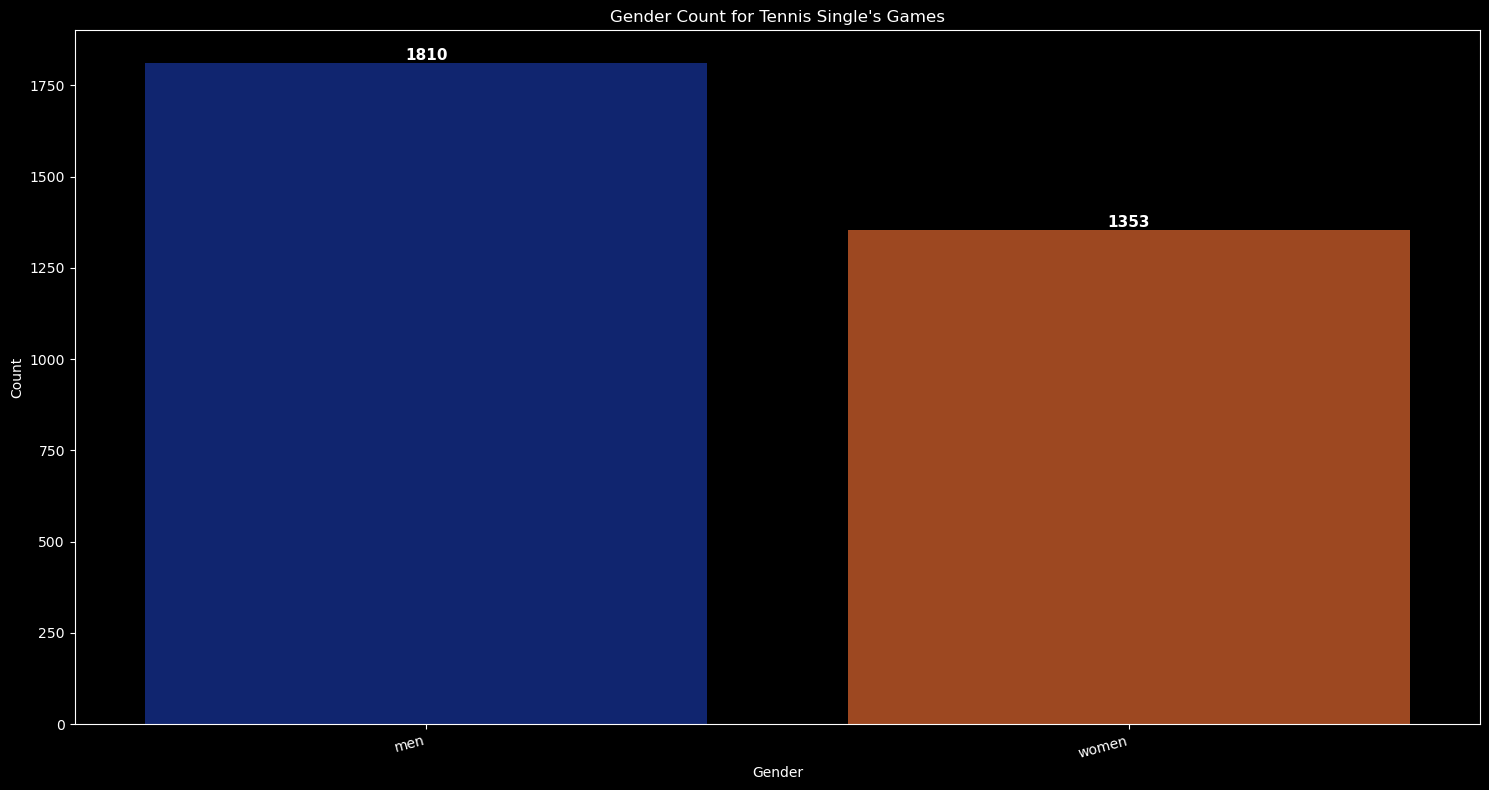

In [199]:
# Chart - 1 visualization code
plt.style.use('dark_background')
gs = data1[data1.type=='singles'].groupby('gender')['gender'].count()
gs_1 = pd.DataFrame(gs)
# Rename the count column
gs_1.rename(columns={'gender': 'count'}, inplace=True)
gs_1.reset_index(inplace=True)
# Create a bar plot
plt.figure(figsize=(15, 8))  # Adjust figure size
ax = sns.barplot(data=gs_1 , x="gender", y="count", hue="gender", palette="dark", legend=False)

# Rotate x-axis labels for better readability
plt.xticks(rotation=15, ha="right")  
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Count for Tennis Single's Games")
for p in ax.patches:
    count = int(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(
        str(count),
        (x, y),
        ha='center',
        va='bottom',
        fontsize=11,
        color='white',  
        fontweight='bold'
    )

plt.grid(False)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The above chart gives proper count in the form of bar chart.

##### 2. What is/are the insight(s) found from the chart?

The following are the insights for the above bar chart:-

1) Men has highest count for single's tennis games which is 1810.
2) Women's count for single's tennis games is 1353. 

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The above insight shows that the men are participating more in single's tennis games than women and shows that global tennis federation can encourage women to participate in tennis games and contribute in this game as an individual.

#### Chart - 2

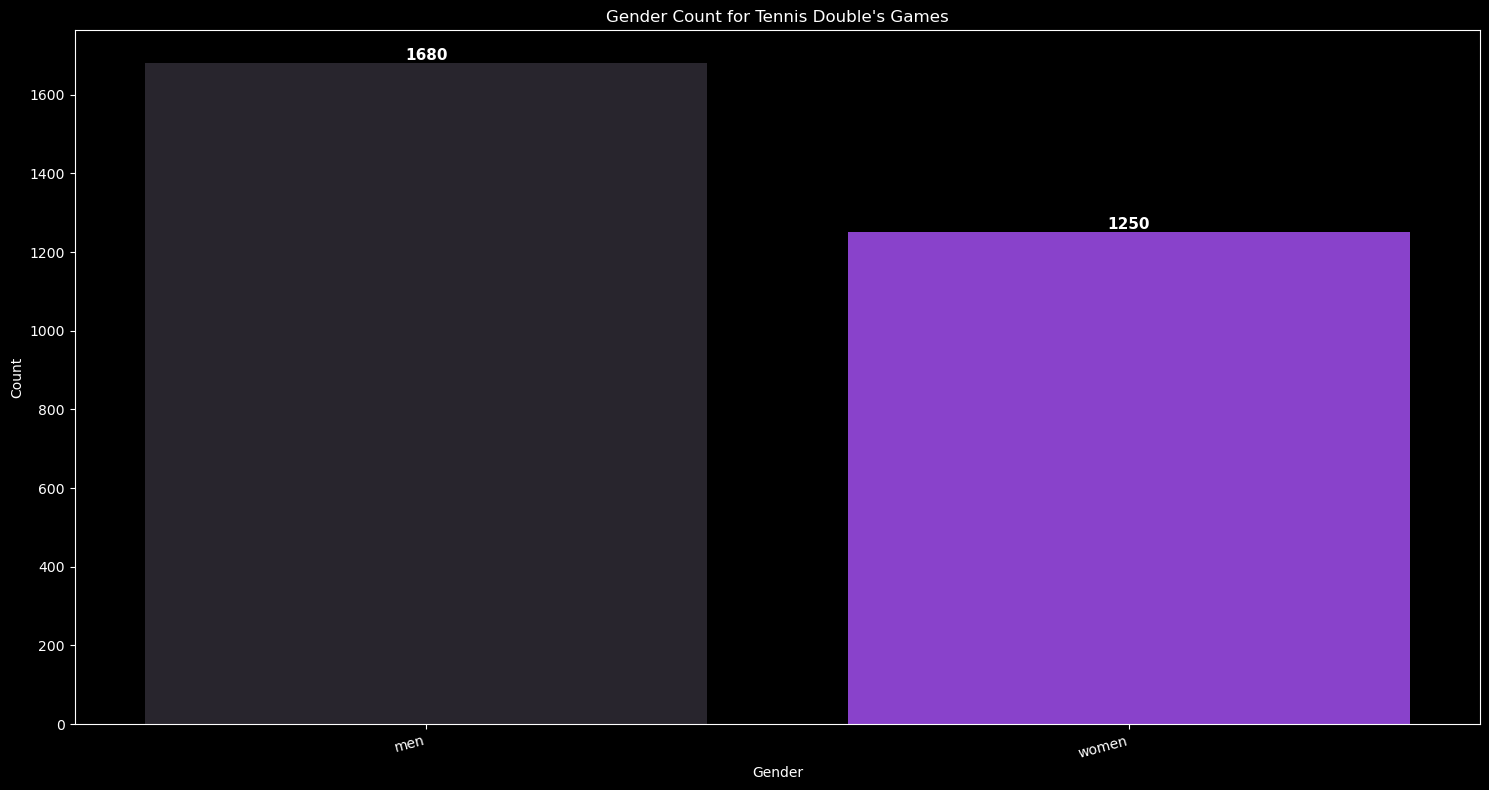

In [209]:
plt.style.use('dark_background')

# Filter, group, and count data
gd = data1[data1.type == 'doubles'].groupby('gender')['gender'].count()
gd_1 = pd.DataFrame(gd)
gd_1.rename(columns={'gender': 'count'}, inplace=True)
gd_1.reset_index(inplace=True)

# Plotting
plt.figure(figsize=(15, 8))
ax = sns.barplot(
    data=gd_1,
    x="gender",
    y="count",
    hue="gender",
    palette='dark:#8A2BE2',
    legend=False
)

plt.xticks(rotation=15, ha="right")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Count for Tennis Double's Games")

# Annotate bars
for p in ax.patches:
    count = int(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(
        str(count),
        (x, y),
        ha='center',
        va='bottom',
        fontsize=11,
        color='white',
        fontweight='bold'
    )

plt.grid(False)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The above chart gives proper count in the form of bar chart.

##### 2. What is/are the insight(s) found from the chart?

The following are the insights for the above bar chart:-

1) Men has highest count for double's tennis games which is 1680.
2) Women's count for double's tennis games is 1250.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The above insight shows that in double's tennis games also the men are dominating so the tennis federation should organize campaigns and seminars to promote women participation in tennis double's game.

#### Chart - 3

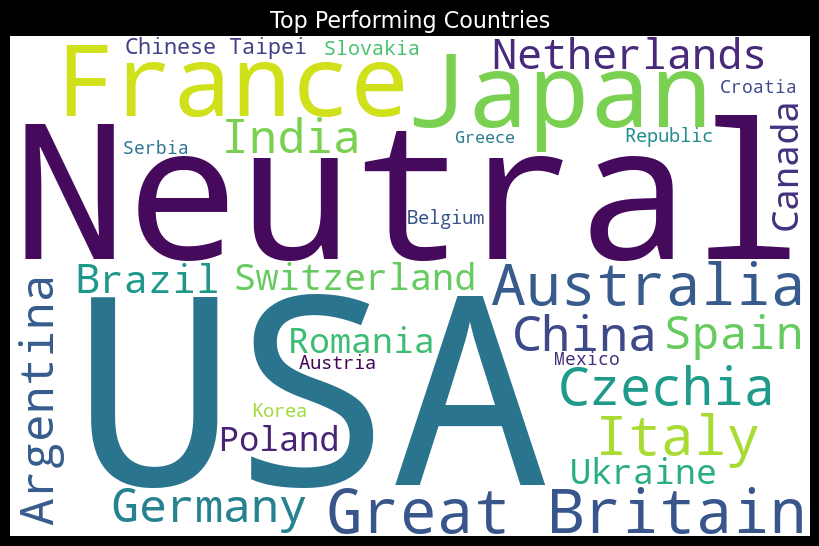

In [221]:
# Chart - 3 visualization code
h1 = data2["country"]  

hl_str = " ".join(map(str, h1.dropna()))  

wordcloud = WordCloud(
    width=800, height=500,
    background_color='white',
    min_font_size=10, max_words=30
).generate(hl_str)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Top Performing Countries", fontsize=16)
plt.tight_layout(pad=0)
plt.show()

##### 1. Why did you pick the specific chart?

The above word cloud gives a rough estimation of best performing variables of a particular column.

##### 2. What is/are the insight(s) found from the chart?

The following are the insights for the above word cloud:-

1) USA has maximum contribution.
2) Neutral is the second highest contributor to produce tennis players.
3) Japan is third in producing best tennis players from their country.
4) France is fourth in producing best tennis players from their country.
5) Great Britain is fifth in producing best tennis players from their country.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The above insight shows that the USA, France and Japan are great at producing tennis players in maximum nos from their countries.

#### Chart - 4

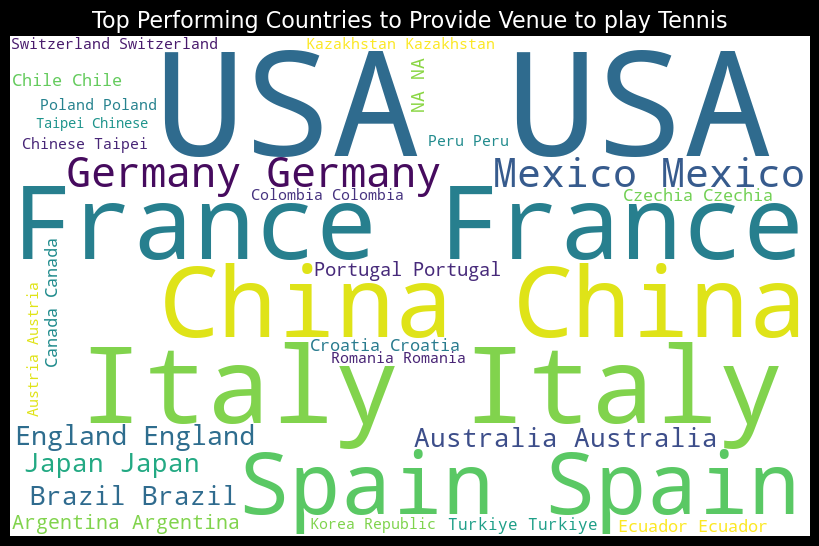

In [225]:
# Chart - 4 visualization code
h2 = data3["country_name"]  

h2_str = " ".join(map(str, h2.dropna()))  

wordcloud = WordCloud(
    width=800, height=500,
    background_color='white',
    min_font_size=10, max_words=30
).generate(h2_str)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Top Performing Countries to Provide Venue to play Tennis", fontsize=16)
plt.tight_layout(pad=0)
plt.show()

##### 1. Why did you pick the specific chart?

The above word cloud gives a rough estimation of best performing variables of a particular column.

##### 2. What is/are the insight(s) found from the chart?

The following are the insights for the above word cloud:-

1) The top country to provide venue is USA.
2) Second highest to provide venue stage is Italy.
3) Third highest to provide venue stage is France.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The above insight shows that the USA, France and Italy are top countries to provide venue's at their place to play tennis games , this is because the major grand slam's tournament's like US open, French open and Wimbeldon generally happens in these countries making these countries a popular place for tennis enthusiast and tennis players.

#### Chart - 5

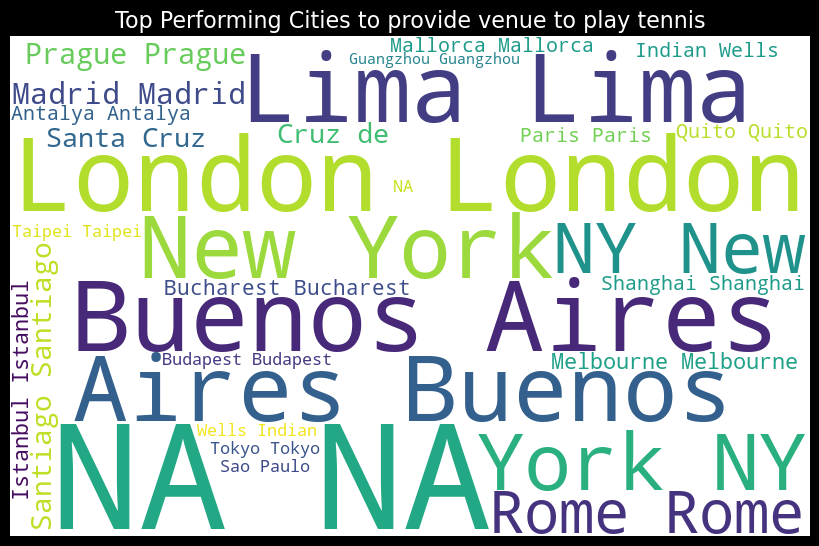

In [227]:
# Chart - 5 visualization code
h3 = data3["city_name"]  

h3_str = " ".join(map(str, h3.dropna()))  

wordcloud = WordCloud(
    width=800, height=500,
    background_color='white',
    min_font_size=10, max_words=30
).generate(h3_str)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Top Performing Cities to provide venue to play tennis", fontsize=16)
plt.tight_layout(pad=0)
plt.show()

##### 1. Why did you pick the specific chart?

The above word cloud gives a rough estimation of best performing variables of a particular column.

##### 2. What is/are the insight(s) found from the chart?

The following are the insights for the above word cloud:-

1) The top city to provide venue is London.
2) Second highest city to provide venue stage is Buenos Aires.
3) Third highest city to provide venue stage is Lima.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The above insight shows that the London, Buenos Aires and Lima are top cities to provide venue's at their place to play tennis games , this is because the major grand slam's tournament's like US open, French open and Wimbeldon mostly happens in these cities making these countries a popular place for tennis enthusiast and tennis players, for example the center court at london is very famous for wimbeldon tournment.

#### Chart - 6

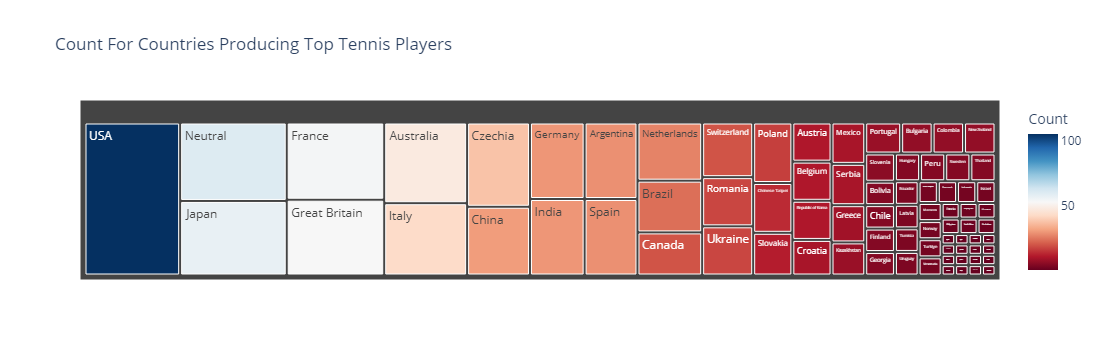

In [235]:
# Chart - 6 visualization code
plt.style.use('dark_background')

data2.columns = data2.columns.str.strip()


d2 = data2["country"].value_counts().reset_index()
d2.columns = ["country", "Count"]

# Create the treemap
fig = px.treemap(d2, 
                 path=['country'], 
                 values='Count', 
                 title="Count For Countries Producing Top Tennis Players",
                 color='Count', 
                 color_continuous_scale="RdBu")

# Show the plot
fig.show()

##### 1. Why did you pick the specific chart?

The tree map gives a clear vision of data in one frame.

##### 2. What is/are the insight(s) found from the chart?

The following are the insights for the above tree map:-

1) USA has maximum contribution.
2) Neutral is the second highest contributor to produce tennis players.
3) Japan is third in producing best tennis players from their country.
4) France is fourth in producing best tennis players from their country.
5) Great Britain is fifth in producing best tennis players from their country.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The above insight shows that the USA, France and Japan are great at producing tennis players in maximum nos from their countries.

#### Chart - 7

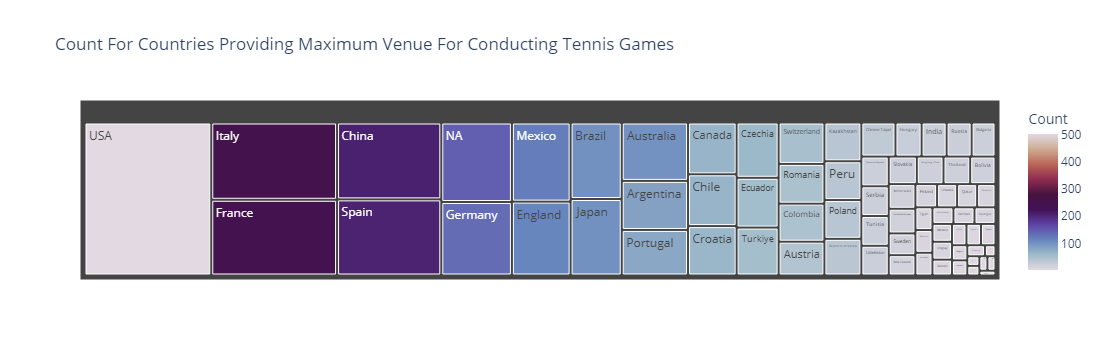

In [239]:
# Chart - 7 visualization code
plt.style.use('dark_background')

data3.columns = data3.columns.str.strip()


d3 = data3["country_name"].value_counts().reset_index()
d3.columns = ["country_name", "Count"]

# Create the treemap
fig = px.treemap(d3, 
                 path=['country_name'], 
                 values='Count', 
                 title="Count For Countries Providing Maximum Venue For Conducting Tennis Games",
                 color='Count', 
                 color_continuous_scale="twilight")

# Show the plot
fig.show()

##### 1. Why did you pick the specific chart?

The tree map gives a clear vision of data in one frame.

##### 2. What is/are the insight(s) found from the chart?

The following are the insights for the above tree map:-

1) The top country to provide venue is USA.
2) Second highest to provide venue stage is Italy.
3) Third highest to provide venue stage is France.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The above insight shows that the USA, France and Italy are top countries to provide venue's at their place to play tennis games , this is because the major grand slam's tournament's like US open, French open and Wimbeldon generally happens in these countries making these countries a popular place for tennis enthusiast and tennis players.

#### Chart - 8

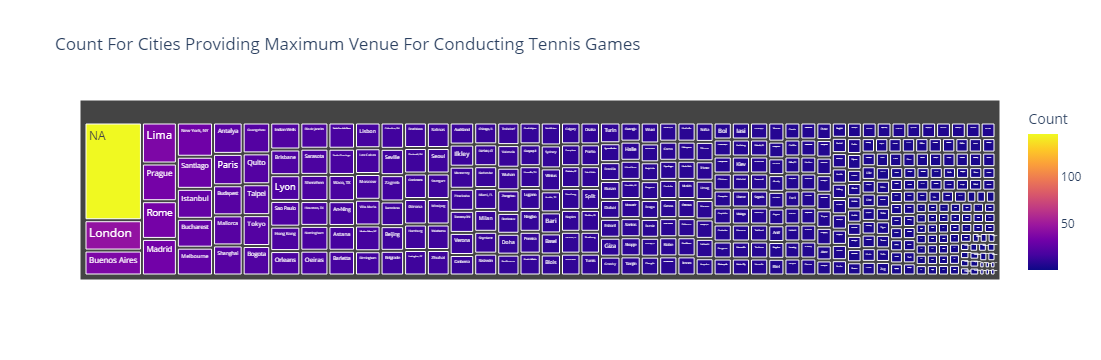

In [241]:
# Chart - 8 visualization code
plt.style.use('dark_background')

data3.columns = data3.columns.str.strip()


d33 = data3["city_name"].value_counts().reset_index()
d33.columns = ["city_name", "Count"]

# Create the treemap
fig = px.treemap(d33, 
                 path=['city_name'], 
                 values='Count', 
                 title="Count For Cities Providing Maximum Venue For Conducting Tennis Games",
                 color='Count', 
                 color_discrete_map={'(?)':'lightgrey', 'Lunch':'gold', 'Dinner':'darkblue'})

# Show the plot
fig.show()

##### 1. Why did you pick the specific chart?

The tree map gives a clear vision of data in one frame.

##### 2. What is/are the insight(s) found from the chart?

The following are the insights for the above tree map:-

1) The top city to provide venue is London.
2) Second highest city to provide venue stage is Buenos Aires.
3) Third highest city to provide venue stage is Lima.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The above insight shows that the London, Buenos Aires and Lima are top cities to provide venue's at their place to play tennis games , this is because the major grand slam's tournament's like US open, French open and Wimbeldon mostly happens in these cities making these countries a popular place for tennis enthusiast and tennis players, for example the center court at london is very famous for wimbeldon tournment.

#### Chart - 9

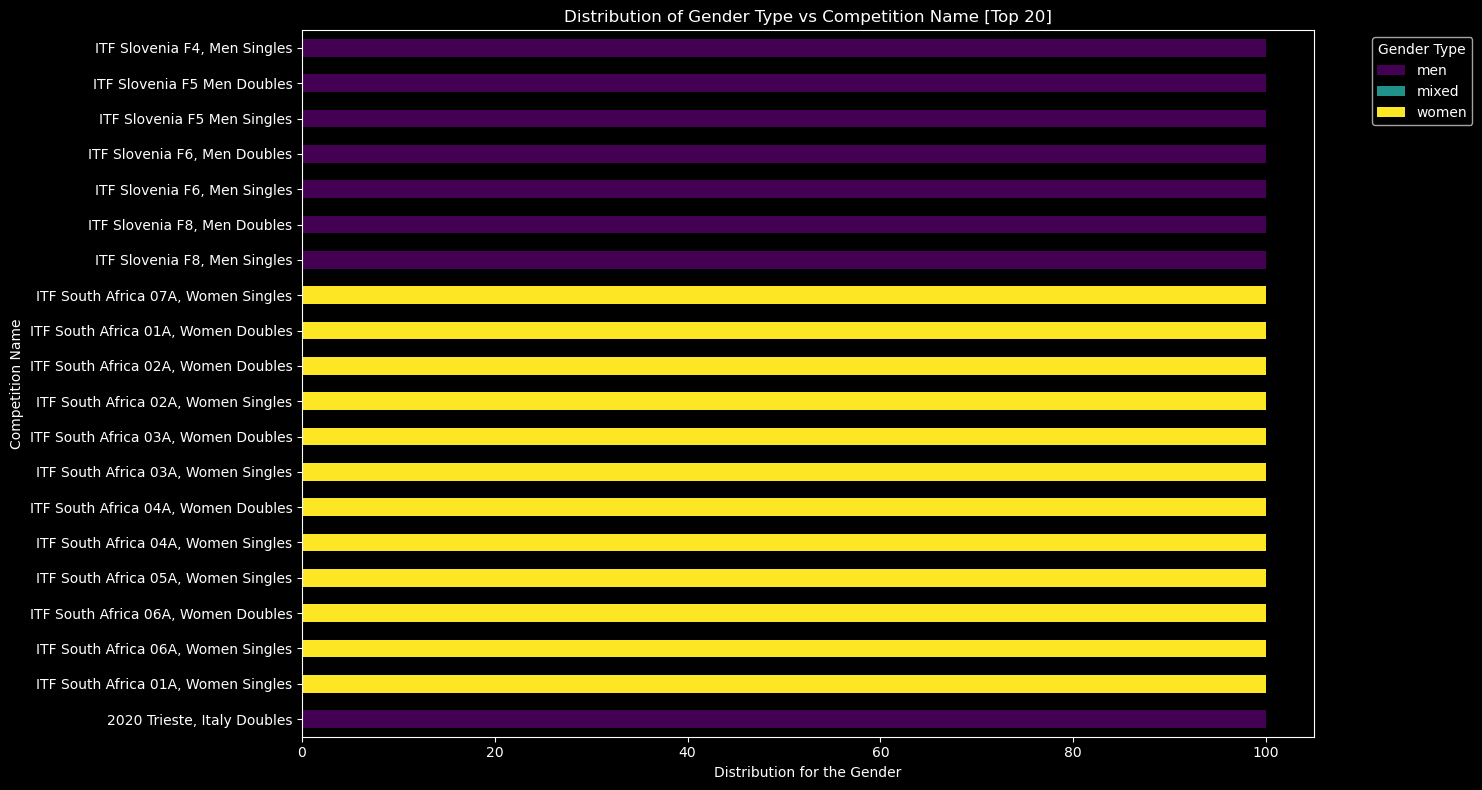

In [257]:
# Chart - 9 visualization code
com_ven = data1.groupby(["competition_name", "gender"]).size().unstack(fill_value=0)


com_ven_1 = com_ven.div(com_ven.sum(axis=1), axis=0) * 100

top_complex = com_ven.sum(axis=1).sort_values(ascending=False).head(20).index
data_com_ven = com_ven_1.loc[top_complex]


fig, ax = plt.subplots(figsize=(15, 8))  
data_com_ven.plot(kind="barh", stacked=True, colormap="viridis", ax=ax)


plt.xlabel("Distribution for the Gender")
plt.ylabel("Competition Name")
plt.title("Distribution of Gender Type vs Competition Name [Top 20]")
plt.legend(title="Gender Type", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The above multi bar plot chart gives clear distribution for the gender according to the game type.

##### 2. What is/are the insight(s) found from the chart?

The following are the insights for the above multi bar chart:-

1) Countries like Italy and Slovenia are dominated by men tennis player's.
2) South Africa country is mostly dominated by women tennis player's.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The above insight shows that the Italy and South Africa can produce players from men and women both gender type, this will make an inclusion of gender equality among others and will promote positivity in the tennis games.

#### Chart - 10

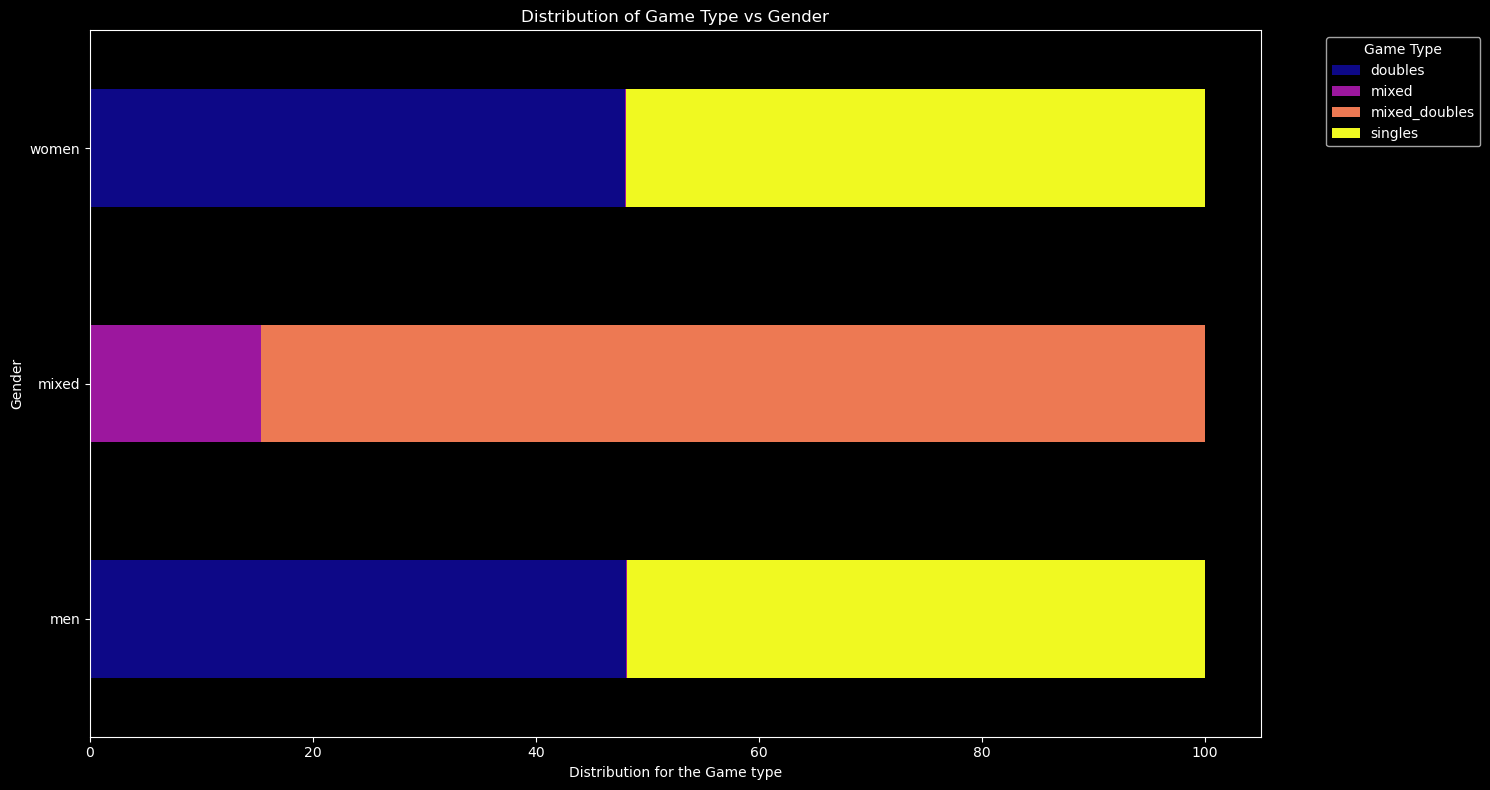

In [20]:
# Chart - 10 visualization code
plt.style.use('dark_background')
gen_ty = data1.groupby(["gender", "type"]).size().unstack(fill_value=0)


gen_ty_1 = gen_ty.div(gen_ty.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(15, 8))  
gen_ty_1.plot(kind="barh", stacked=True, colormap="plasma", ax=ax)


plt.xlabel("Distribution for the Game type")
plt.ylabel("Gender")
plt.title("Distribution of Game Type vs Gender")
plt.legend(title="Game Type", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The above multi bar plot chart gives clear distribution for the game type for each gender.

##### 2. What is/are the insight(s) found from the chart?

The following are the insights for the above multi bar chart:-

1) For men and women gender the distribution of single's and double's game type is equally distributed.
2) For mixed gender, less than 20% distribution is for mixed game type and rest is distributed for the mixed_double's game type.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The above insight shows that the men and women gender are giving equal importance to single's game as well as double's game type while the mixed gender is focusing more on mixed double's game type rather than the mixed single's game type.

#### Chart - 11

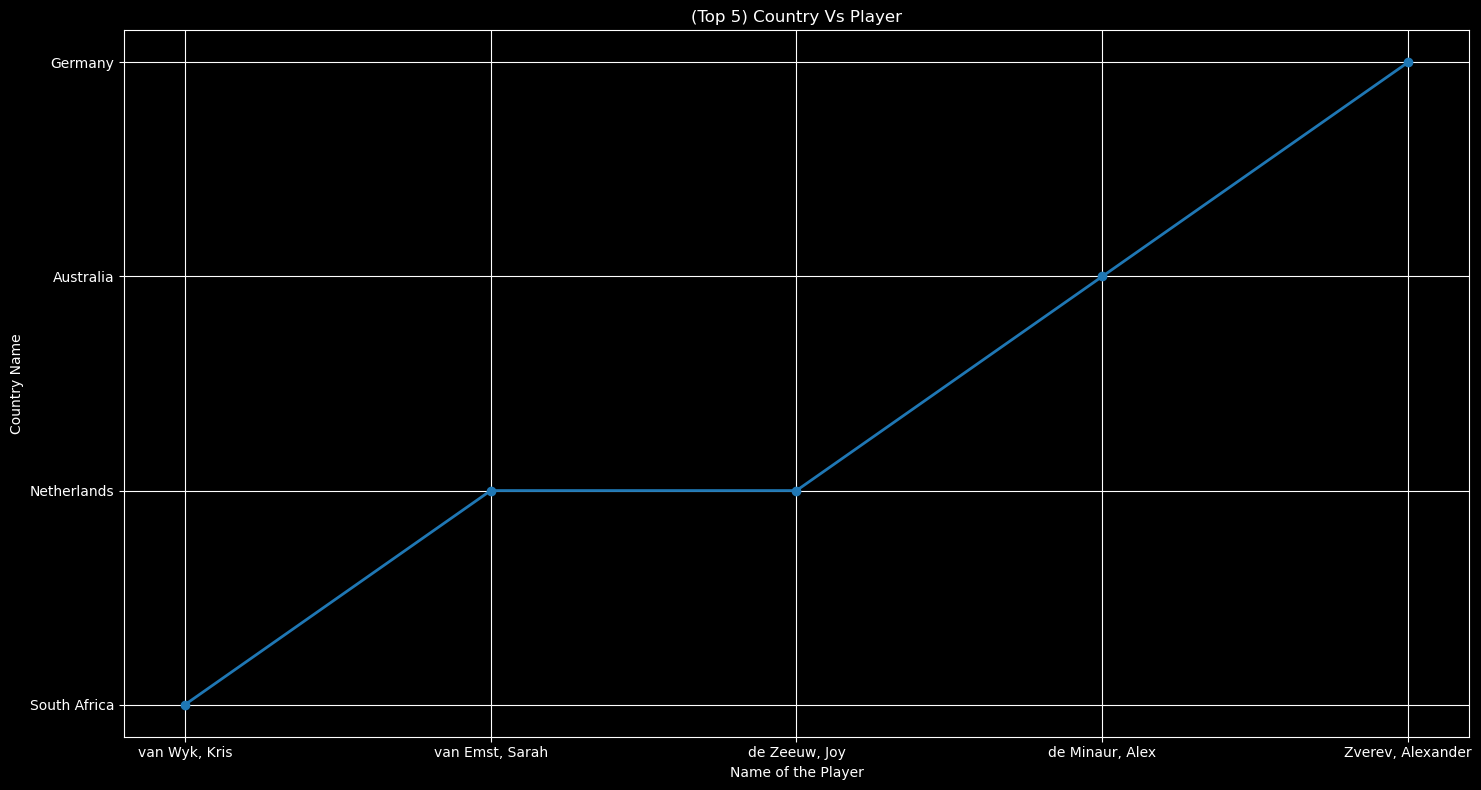

In [265]:
# Chart - 11 visualization code
plt.style.use('dark_background')

# Remove any leading or trailing spaces from column names
data2.columns = data2.columns.str.strip()

# Sort by date_added and release_year, then select the top 15
top_d2 = data2[['name', 'country']].sort_values(by='name', ascending=False).head(5)

# Plot the results
plt.figure(figsize=(15, 8))
plt.plot(top_d2['name'], top_d2['country'], marker="o", color='tab:blue', linestyle='-', linewidth=2)

plt.xlabel("Name of the Player")
plt.ylabel("Country Name")
plt.title("(Top 5) Country Vs Player")
plt.grid(True)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The above line chart gives clear trend analysis over a period of specific time.

##### 2. What is/are the insight(s) found from the chart?

The following are the insights for the above line chart:-

1) The top performing player is from germany whose name is zverev, alexander.
2) The second highest performing player is from australia whose name is de minaur, alex.
3) The third highest performing player is from netherlands whose name is de zeeuw, joy.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The above insight shows that the top performing tennis players are from germany, australia and netherlands.

#### Chart - 12

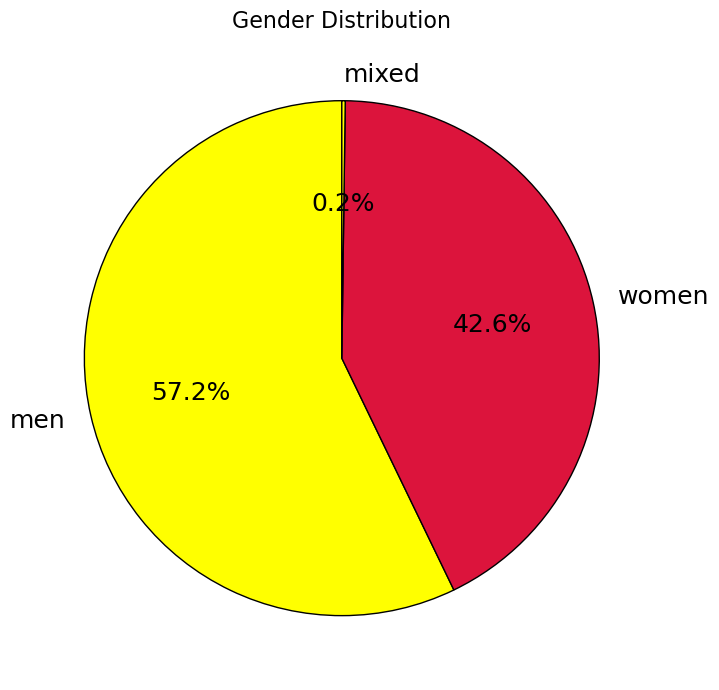

In [279]:
# Chart - 12 visualization code
plt.style.use('default')
data1.columns = data1.columns.str.strip()

co = data1['gender'].value_counts().head(10)

plt.figure(figsize=(15, 7))
plt.pie(
    co,
    labels=co.index,
    colors=['yellow', 'crimson'],
    startangle=90,
    autopct='%1.1f%%',  # Show percentages
    wedgeprops={'edgecolor': 'black'},
    textprops={'fontsize': 18, 'color': 'black'}
)

plt.title('Gender Distribution', fontsize=16)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The above pie chart is good for analyzing the distribution for the gender for the tennis player's.

##### 2. What is/are the insight(s) found from the chart?

The following are the insights for the above pie chart:-

1) The highest distribution is for men tennis players which is 57.2%.
2) The second highest distribution is for women tennis players which is 42.6%.
3) The third and lowest distribution is for the mixed tennis players where both men and women play together which is 0.2%.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The above insight shows that the men are dominating in the tennis game contribution criteria.

#### Chart - 13

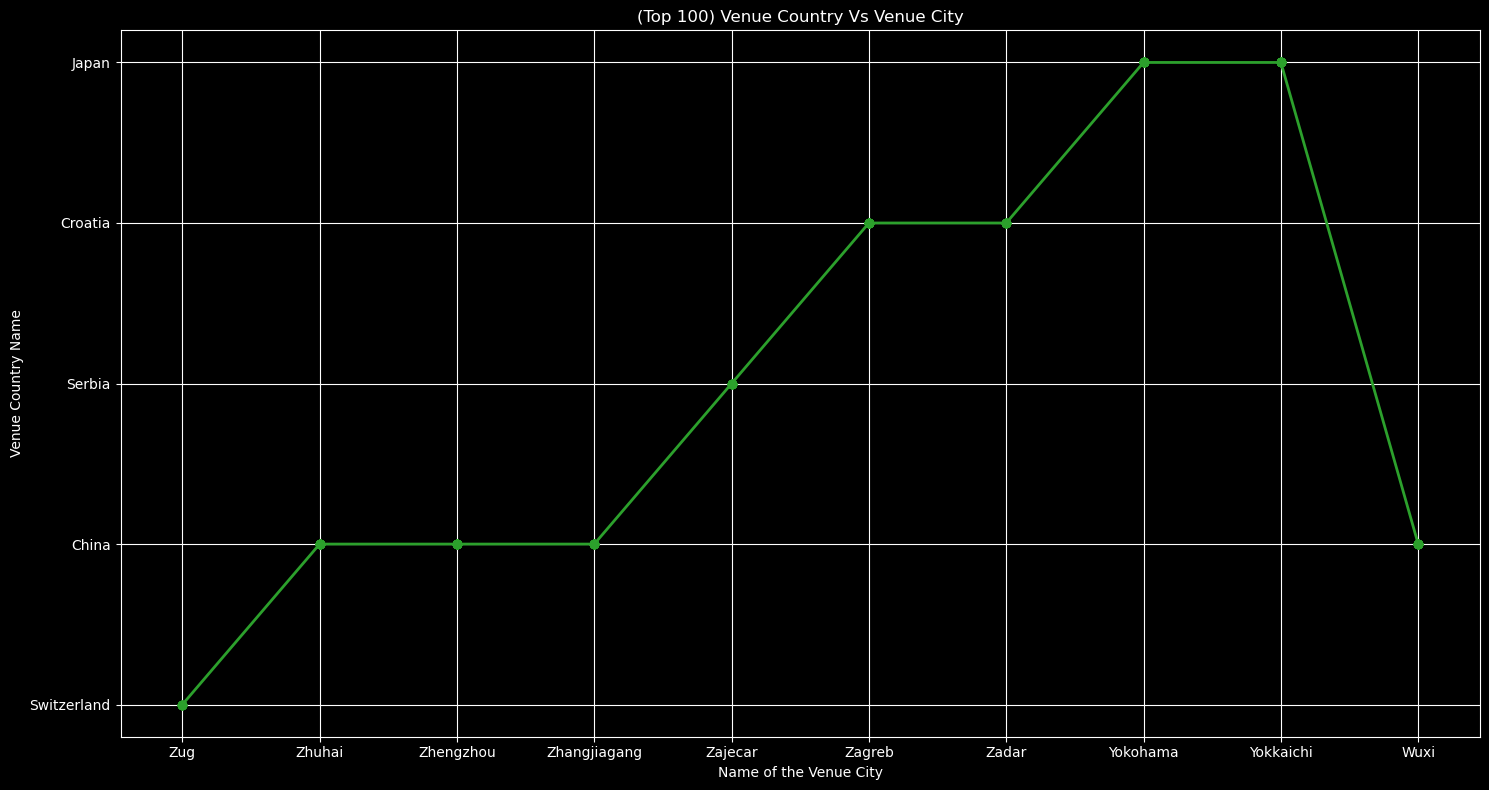

In [293]:
# Chart - 13 visualization code
plt.style.use('dark_background')

# Remove any leading or trailing spaces from column names
data3.columns = data3.columns.str.strip()

# Sort by city_name and select the top 5
top_d3 = data3[['city_name', 'country_name']].sort_values(by='city_name', ascending=False).head(100)

# Plot the results
plt.figure(figsize=(15, 8))
plt.plot(
    top_d3['city_name'],
    top_d3['country_name'],
    marker="o",
    color='tab:green',
    linestyle='-',
    linewidth=2
)

plt.xlabel("Name of the Venue City")
plt.ylabel("Venue Country Name")
plt.title("(Top 100) Venue Country Vs Venue City")
plt.grid(True)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The above line chart gives clear trend analysis over a period of specific time.

##### 2. What is/are the insight(s) found from the chart?

The following are the insights for the above line chart:-

1) The top cities providing venue are from japan which are Yokohama and yokkaichi.
2) The second highest performing cities to provide venue are from croatia which are zagreb and zadar.
3) The third highest performing city to provide venue is from serbia which is zajecar.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The above insight shows that the top performing cities are from japan, serbia and croatia.

#### Chart - 14 - Correlation Heatmap

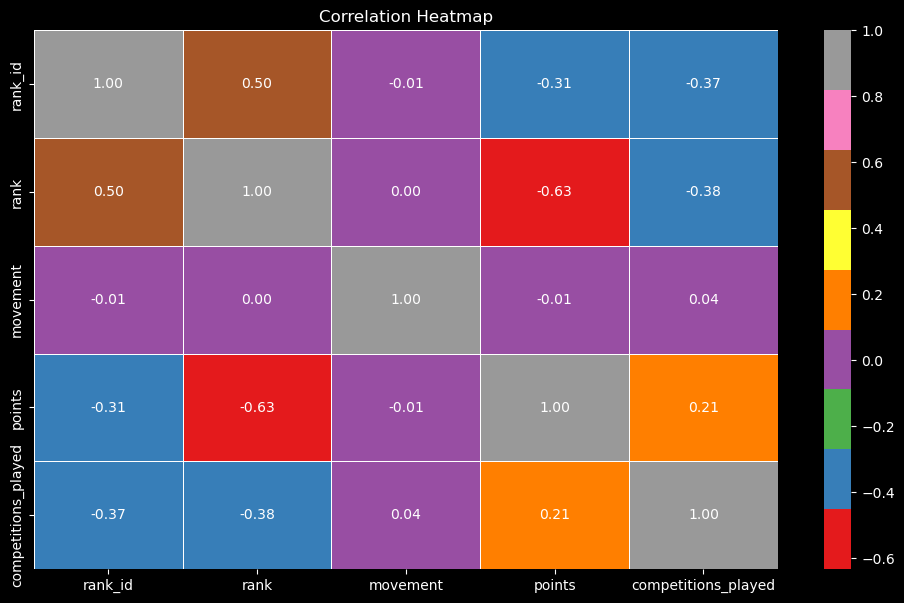

In [189]:
plt.style.use('dark_background')
heat = data2.select_dtypes(include=['int64', 'float64'])

heat_map = heat.corr().fillna(0)  
plt.figure(figsize=(12, 7))
sns.heatmap(heat_map, annot=True, cmap="Set1", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

##### 1. Why did you pick the specific chart?

The above heatmap is best to find correlation between different numerical variables.

##### 2. What is/are the insight(s) found from the chart?

The following are the insights for the above heatmap:-

1) The highest correlation is between rank_id and rank with value of 0.5.
2) Second highest correlation is between points and competitions_played with value of 0.21.
3) The lowest correlation is between rank and points with value of -0.63.

#### Chart - 15 - Pair Plot

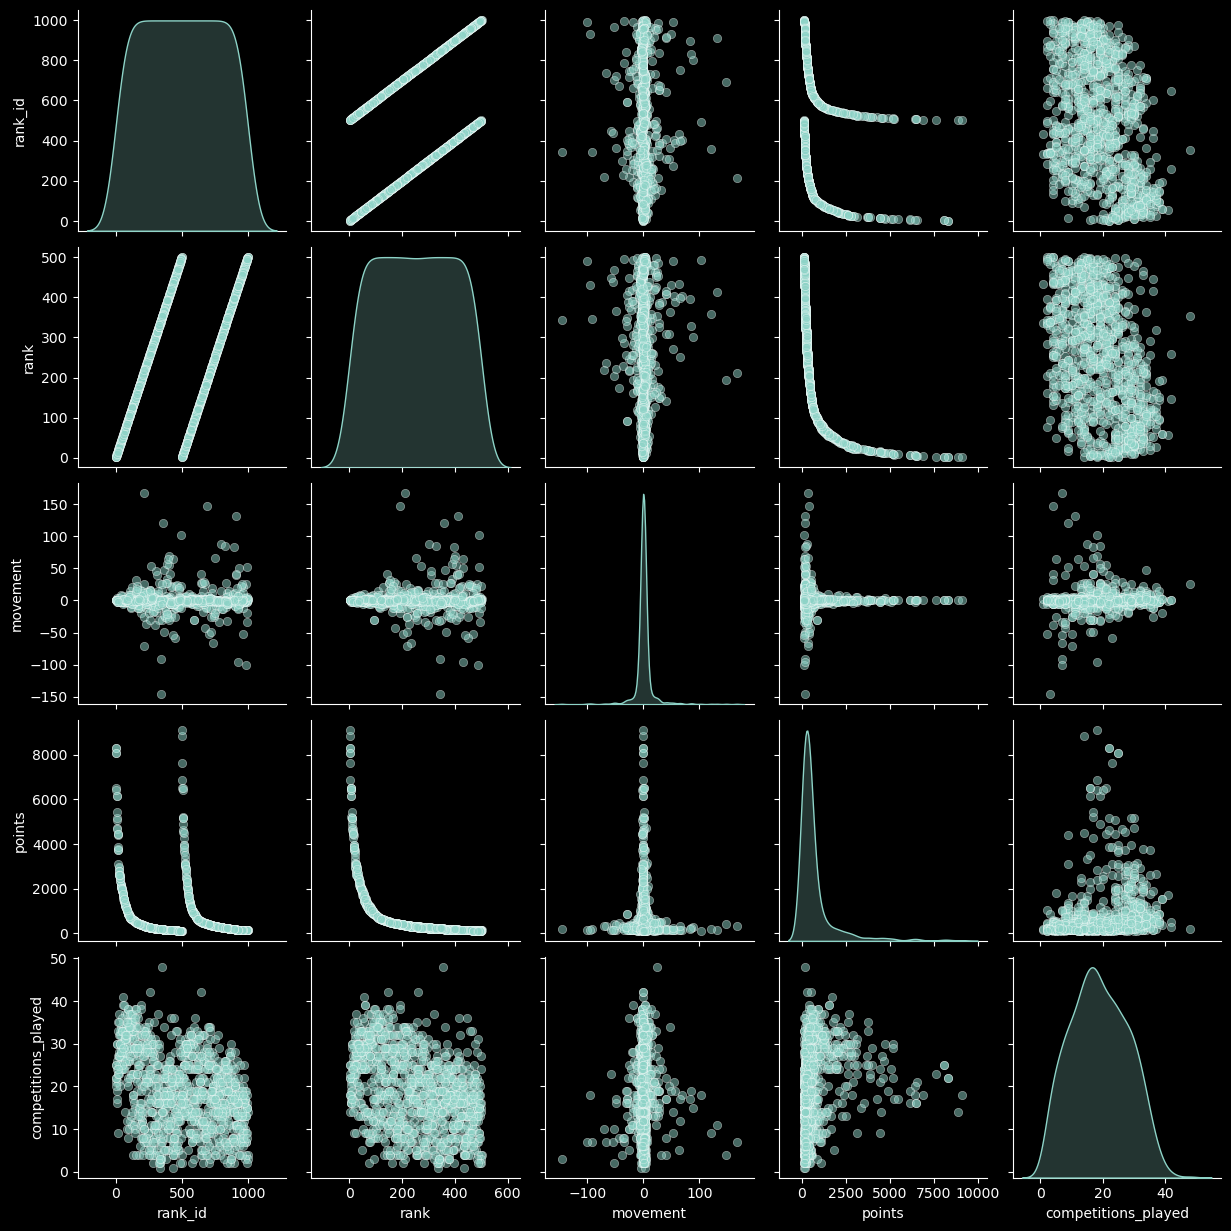

In [191]:
# Pair Plot visualization code
plt.style.use('dark_background')
numerical = data2.select_dtypes(include=['int64', 'float64'])
numerical = numerical.dropna(axis=1, thresh=len(numerical) * 0.8) 
sns.pairplot(numerical, diag_kind='kde', plot_kws={'alpha': 0.5})  
plt.show()

##### 1. Why did you pick the specific chart?

The above pair plot is best to compare numerical variables with itself and with each other.

##### 2. What is/are the insight(s) found from the chart?

The following are the insights for the above pair plot:-

1) points variable when compared with rank_id and rank it is showing a continuous decline over a peiod of time.
2) rank when compared with rank_id shows an straight increasing line over a period of specific time.

### PowerBI Analysis for the Three Merged Datasets

#### Category Competition Dataset Power BI Analysis

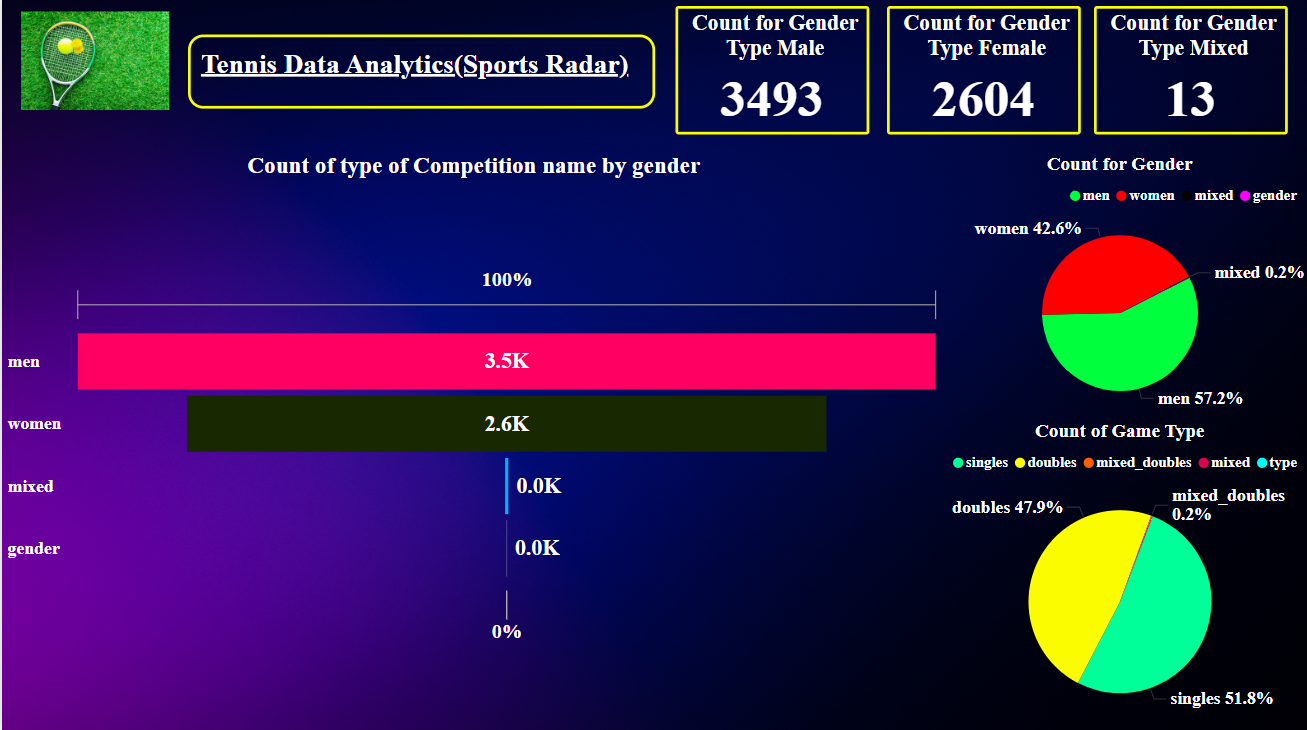

In [5]:
from PIL import Image
import IPython.display as display

image_path = "C:\\Users\\hp\\Desktop\\Exam Docs\\Labmentix Data analytics intern\\Week 17- Major Last Project\\PowerBI\\category_tennis_game_power_bi.png"

# Change this to your actual image path
image = Image.open(image_path)

display.display(image)  
# Show image in Jupyter

#### Competitor Ranking Dataset Power BI Analysis

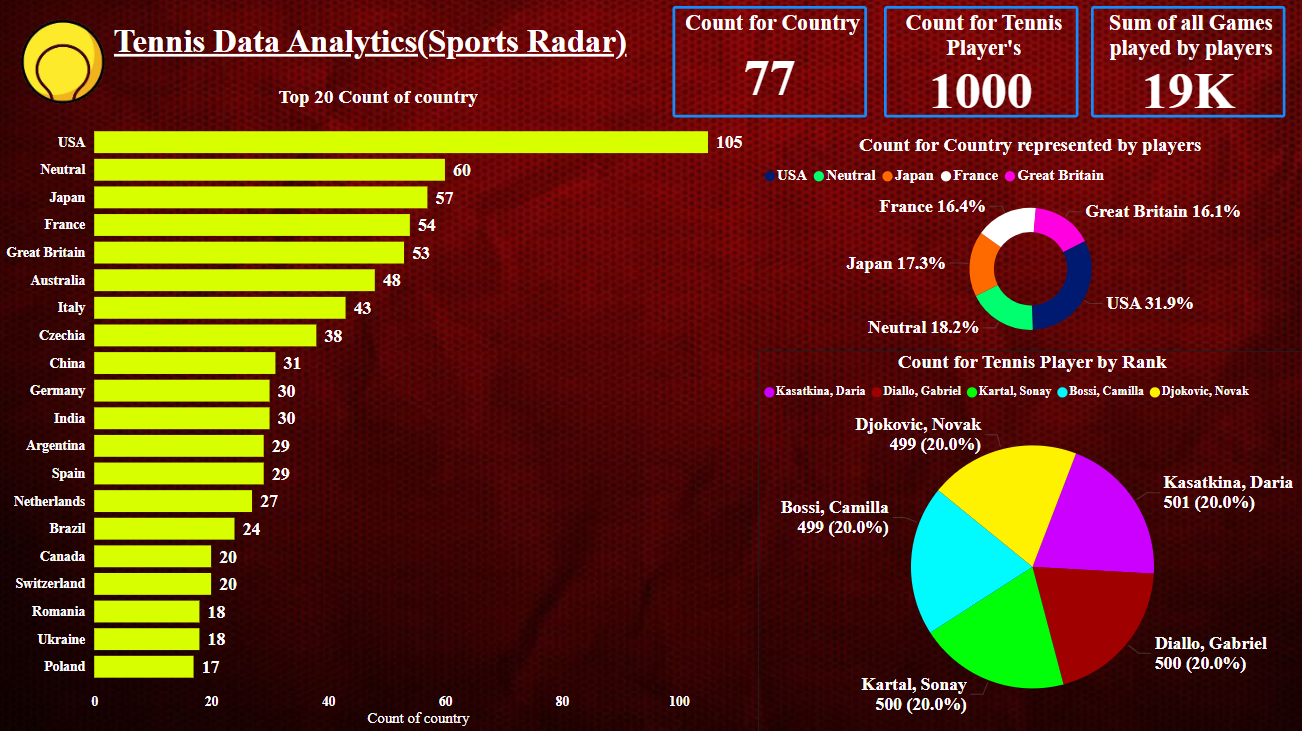

In [9]:
from PIL import Image
import IPython.display as display

image_path = "C:\\Users\\hp\\Desktop\\Exam Docs\\Labmentix Data analytics intern\\Week 17- Major Last Project\\PowerBI\\competitors_rankings_power_bi.png"

# Change this to your actual image path
image = Image.open(image_path)

display.display(image)  
# Show image in Jupyter

#### Complexes Venue Dataset Power BI Analysis

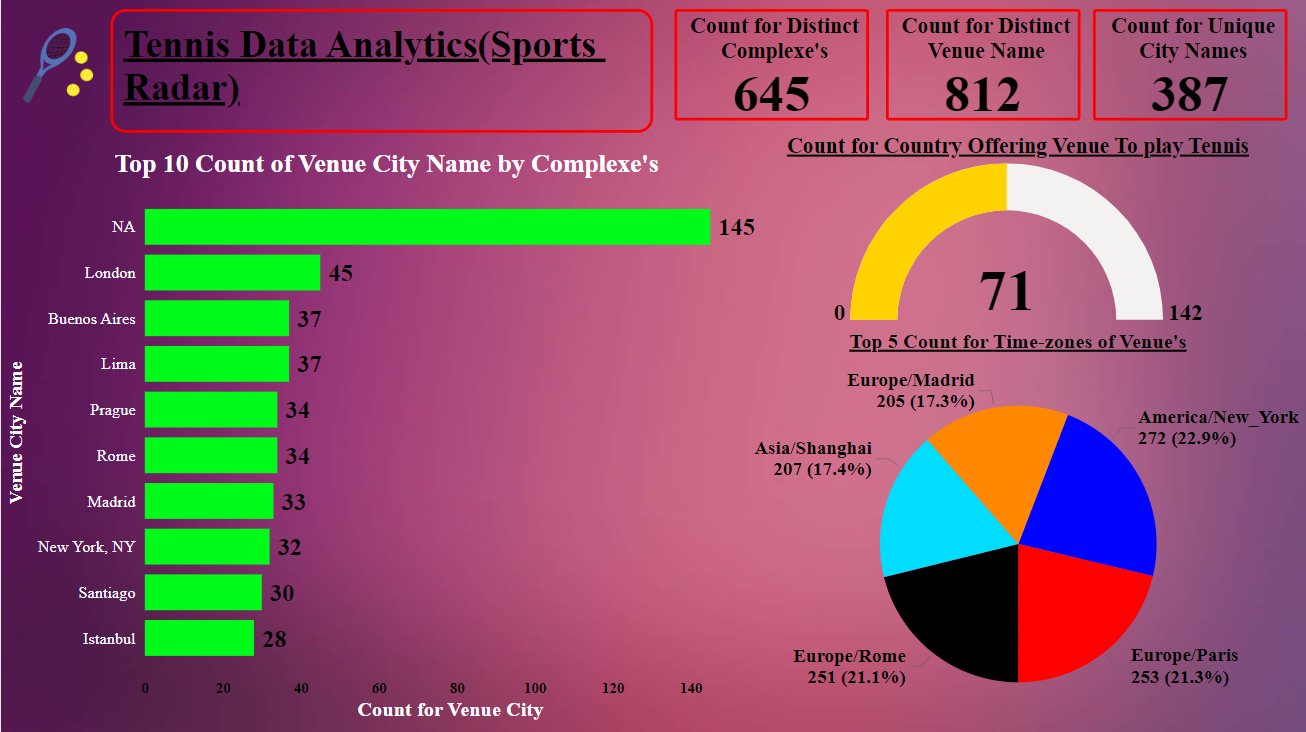

In [1]:
from PIL import Image
import IPython.display as display

image_path = "C:\\Users\\hp\\Desktop\\Exam Docs\\Labmentix Data analytics intern\\Week 17- Major Last Project\\PowerBI\\complexes_venue_power_bi.png"

# Change this to your actual image path
image = Image.open(image_path)

display.display(image)  
# Show image in Jupyter

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

The following are the suggestions to full fill the business objective for the Tennis Federation's:-

1) Men are participating more in single's tennis games than women and shows that global tennis federation can encourage women to participate in tennis games and contribute in this game as an individual.
2) In double's tennis games also the men are dominating so the tennis federation should organize campaigns and seminars to promote women participation in tennis double's game.
3) USA, France and Japan are great at producing tennis players in maximum nos from their countries.
4) USA, France and Italy are top countries to provide venue's at their place to play tennis games , this is because the major grand slam's tournament's like US open, French open and Wimbeldon generally happens in these countries making these countries a popular place for tennis enthusiast and tennis players.
5) London, Buenos Aires and Lima are top cities to provide venue's at their place to play tennis games , this is because the major grand slam's tournament's like US open, French open and Wimbeldon mostly happens in these cities making these countries a popular place for tennis enthusiast and tennis players, for example the center court at london is very famous for wimbeldon tournment.
6) Italy and South Africa can produce players from men and women both gender type, this will make an inclusion of gender equality among others and will promote positivity in the tennis games.
7) Men and women gender are giving equal importance to single's game as well as double's game type while the mixed gender is focusing more on mixed double's game type rather than the mixed single's game type.


The above are some suggestion/ points which can help tennis federation to improve tennis overall experience for both audience and players.

# **Conclusion**

The following are the concluding points for the EDA analysis of Tennis Game Dataset extracted from the Sport Radar API Websource:-

1) There are total 6 datasets but we merged them into 3.
2) There are 8 columns have some missing values in them.
3) There are no duplicates for all three merged datasets.
4) Size of the Merged Dataset 1 - 6110 rows , 7 columns.
5) Size of the Merged Dataset 2 - 1000 rows, 10 columns.
6) Size of the Merged Dataset 3 - 3600 rows, 8 columns.
7) Men has highest count for single's tennis games which is 1810 and women's count for single's tennis games is 1353.
8) Men has highest count for double's tennis games which is 1680 and women's count for double's tennis games is 1250.
9) USA has maximum contribution, neutral is the second highest contributor to produce tennis playersn, Japan is third in producing best tennis players from their country, France is fourth in producing best tennis players from their country and Great Britain is fifth in producing best tennis players from their country.
10) The top country to provide venue is USA, Second highest to provide venue stage is Italy and third highest to provide venue stage is France.
11) The top city to provide venue is London, Second highest city to provide venue stage is Buenos Aires, third highest city to provide venue stage is Lima.
12) Countries like Italy and Slovenia are dominated by men tennis player's and South Africa country is mostly dominated by women tennis player's.
13) For men and women gender the distribution of single's and double's game type is equally distributed and for mixed gender, less than 20% distribution is for mixed game type and rest is distributed for the mixed_double's game type.
14) The highest distribution is for men tennis players which is 57.2%.
15) The second highest distribution is for women tennis players which is 42.6%.
16) The third and lowest distribution is for the mixed tennis players where both men and women play together which is 0.2%.
17) The highest correlation is between rank_id and rank with value of 0.5.
18) Second highest correlation is between points and competitions_played with value of 0.21.
19) The lowest correlation is between rank and points with value of -0.63.

The above are some important concluding points for the whole EDA analysis for the tennis game dataset from sports radar API Websource.